In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from bib.cleaning import *
from bib.plot import *
from bib.rede import *

In [2]:
a = get_all_data()

In [3]:
a

,Contato_idade,id,Idade
0,24.0,Belgica2006_0,22.0
1,22.0,Belgica2006_0,22.0
2,22.0,Belgica2006_0,22.0
3,48.0,Belgica2006_0,22.0
4,25.0,Belgica2006_0,22.0
...,...,...,...
215650,9.0,Zimbabwe_1244,7.0
215651,9.0,Zimbabwe_1244,7.0
215652,53.0,Zimbabwe_1244,7.0
215653,29.0,Zimbabwe_1244,7.0


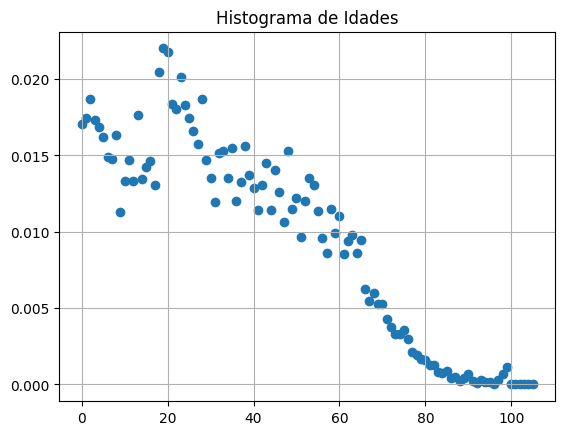

In [4]:
plot_idades(a)

In [4]:
quartis = [0,20,30,50,70,10000]

In [5]:
a = transform_faixa(a,"Idade",quartis)
a = transform_faixa(a,"Contato_idade",quartis)

In [6]:
polymod = [i for i in a['id'].unique() if('POLYMOD' in i)]
polymod = a[a['id'].isin(polymod)]
contagem = pd.crosstab(polymod['id'], polymod['Contato_idadeFaixas']).values
faixas = polymod.drop_duplicates(subset='id')['IdadeFaixas'].values

In [9]:
faixas.shape

(7189,)

In [8]:
print(f"Grau médio: {np.mean(np.sum(contagem,axis = 1))}")
for f in range(5):
    print(f"Grau médio da faixa etária {f+1}: {np.mean(np.sum(contagem[faixas == f],axis = 1))}")

Grau médio: 13.531506468215328
Grau médio da faixa etária 1: 13.002945508100147
Grau médio da faixa etária 2: 14.098737083811711
Grau médio da faixa etária 3: 13.462165308498253
Grau médio da faixa etária 4: 14.026576019777503
Grau médio da faixa etária 5: 14.507518796992482


In [32]:
resultado = np.loadtxt("./C/test.txt")
faixas_ = np.loadtxt("./C/test2.txt")

In [9]:
contagem = pd.crosstab(a['id'], a['Contato_idadeFaixas']).values
faixas = a.drop_duplicates(subset='id')['IdadeFaixas'].values

In [144]:
data = pd.read_csv('./output/participantes.csv')
contatos01 = pd.read_csv('./output/contatos_01.csv')

In [40]:
vetor[vetor != np.arange(len(vetor))[np.sum(vetor,axis = 1) == 0]]

/tmp/ipykernel_19787/3761567207.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  vetor[vetor != np.arange(len(vetor))[np.sum(vetor,axis = 1) == 0]]


array([[[18.,  8., 23.,  7.,  2.],
        [21.,  7., 20.,  8.,  2.],
        [12., 12., 22.,  7.,  2.],
        ...,
        [ 6.,  0.,  1.,  0.,  0.],
        [11.,  0.,  2.,  0.,  0.],
        [ 2.,  0.,  0.,  0.,  0.]]])

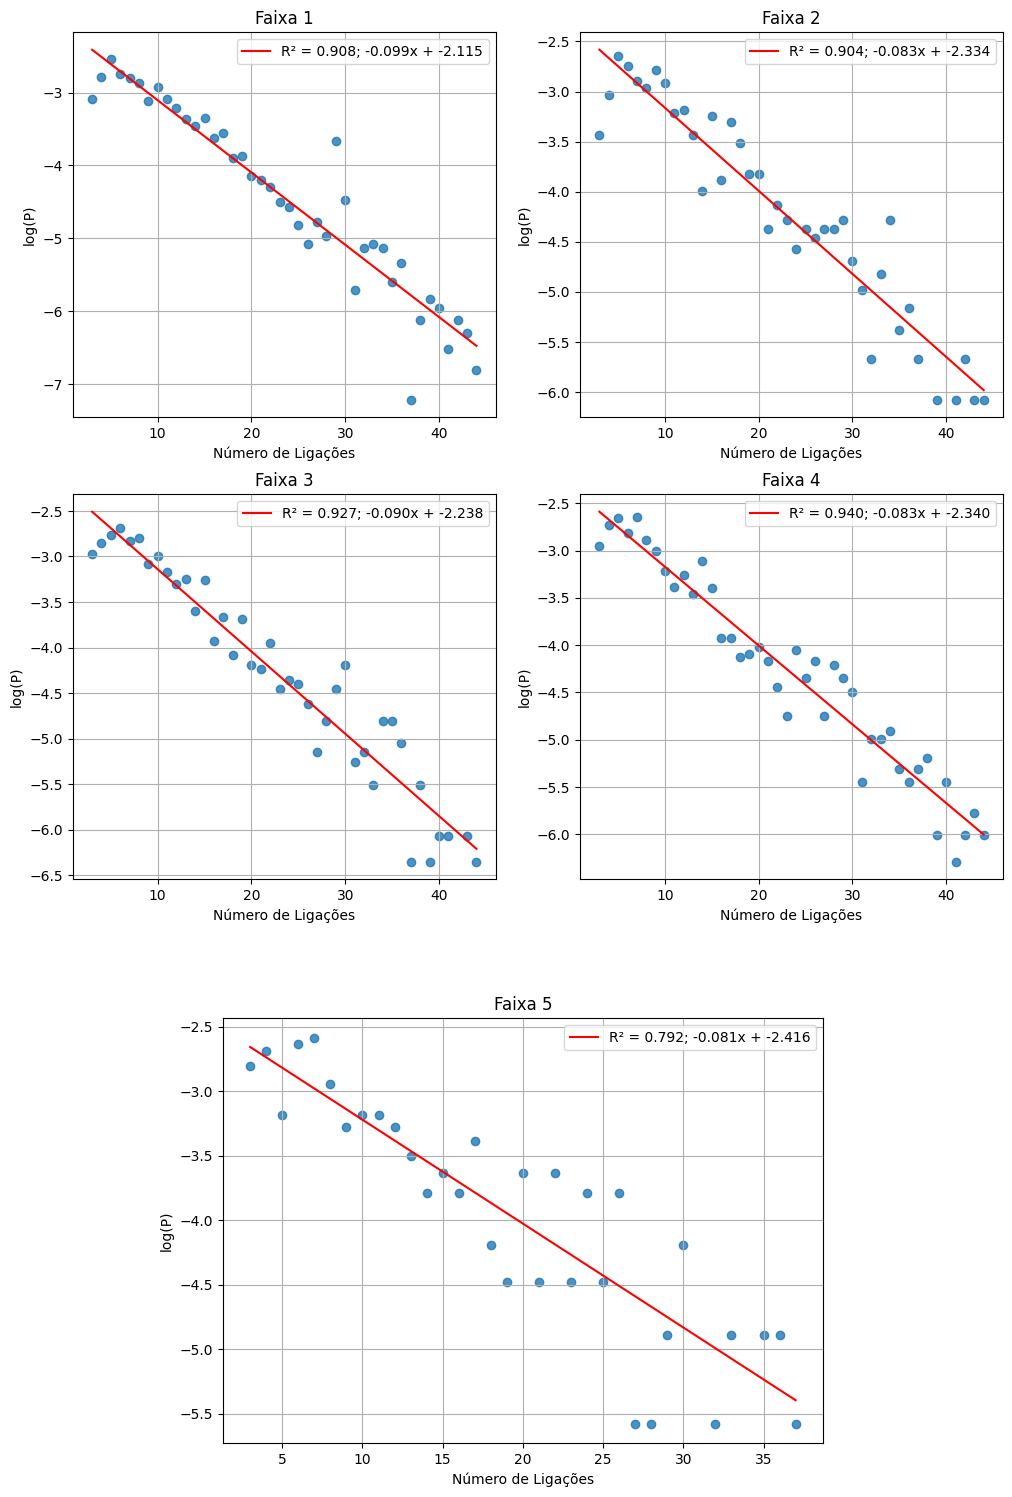

In [36]:
A,B,C,S = generate_distribution_byfaixas(contagem,faixas)

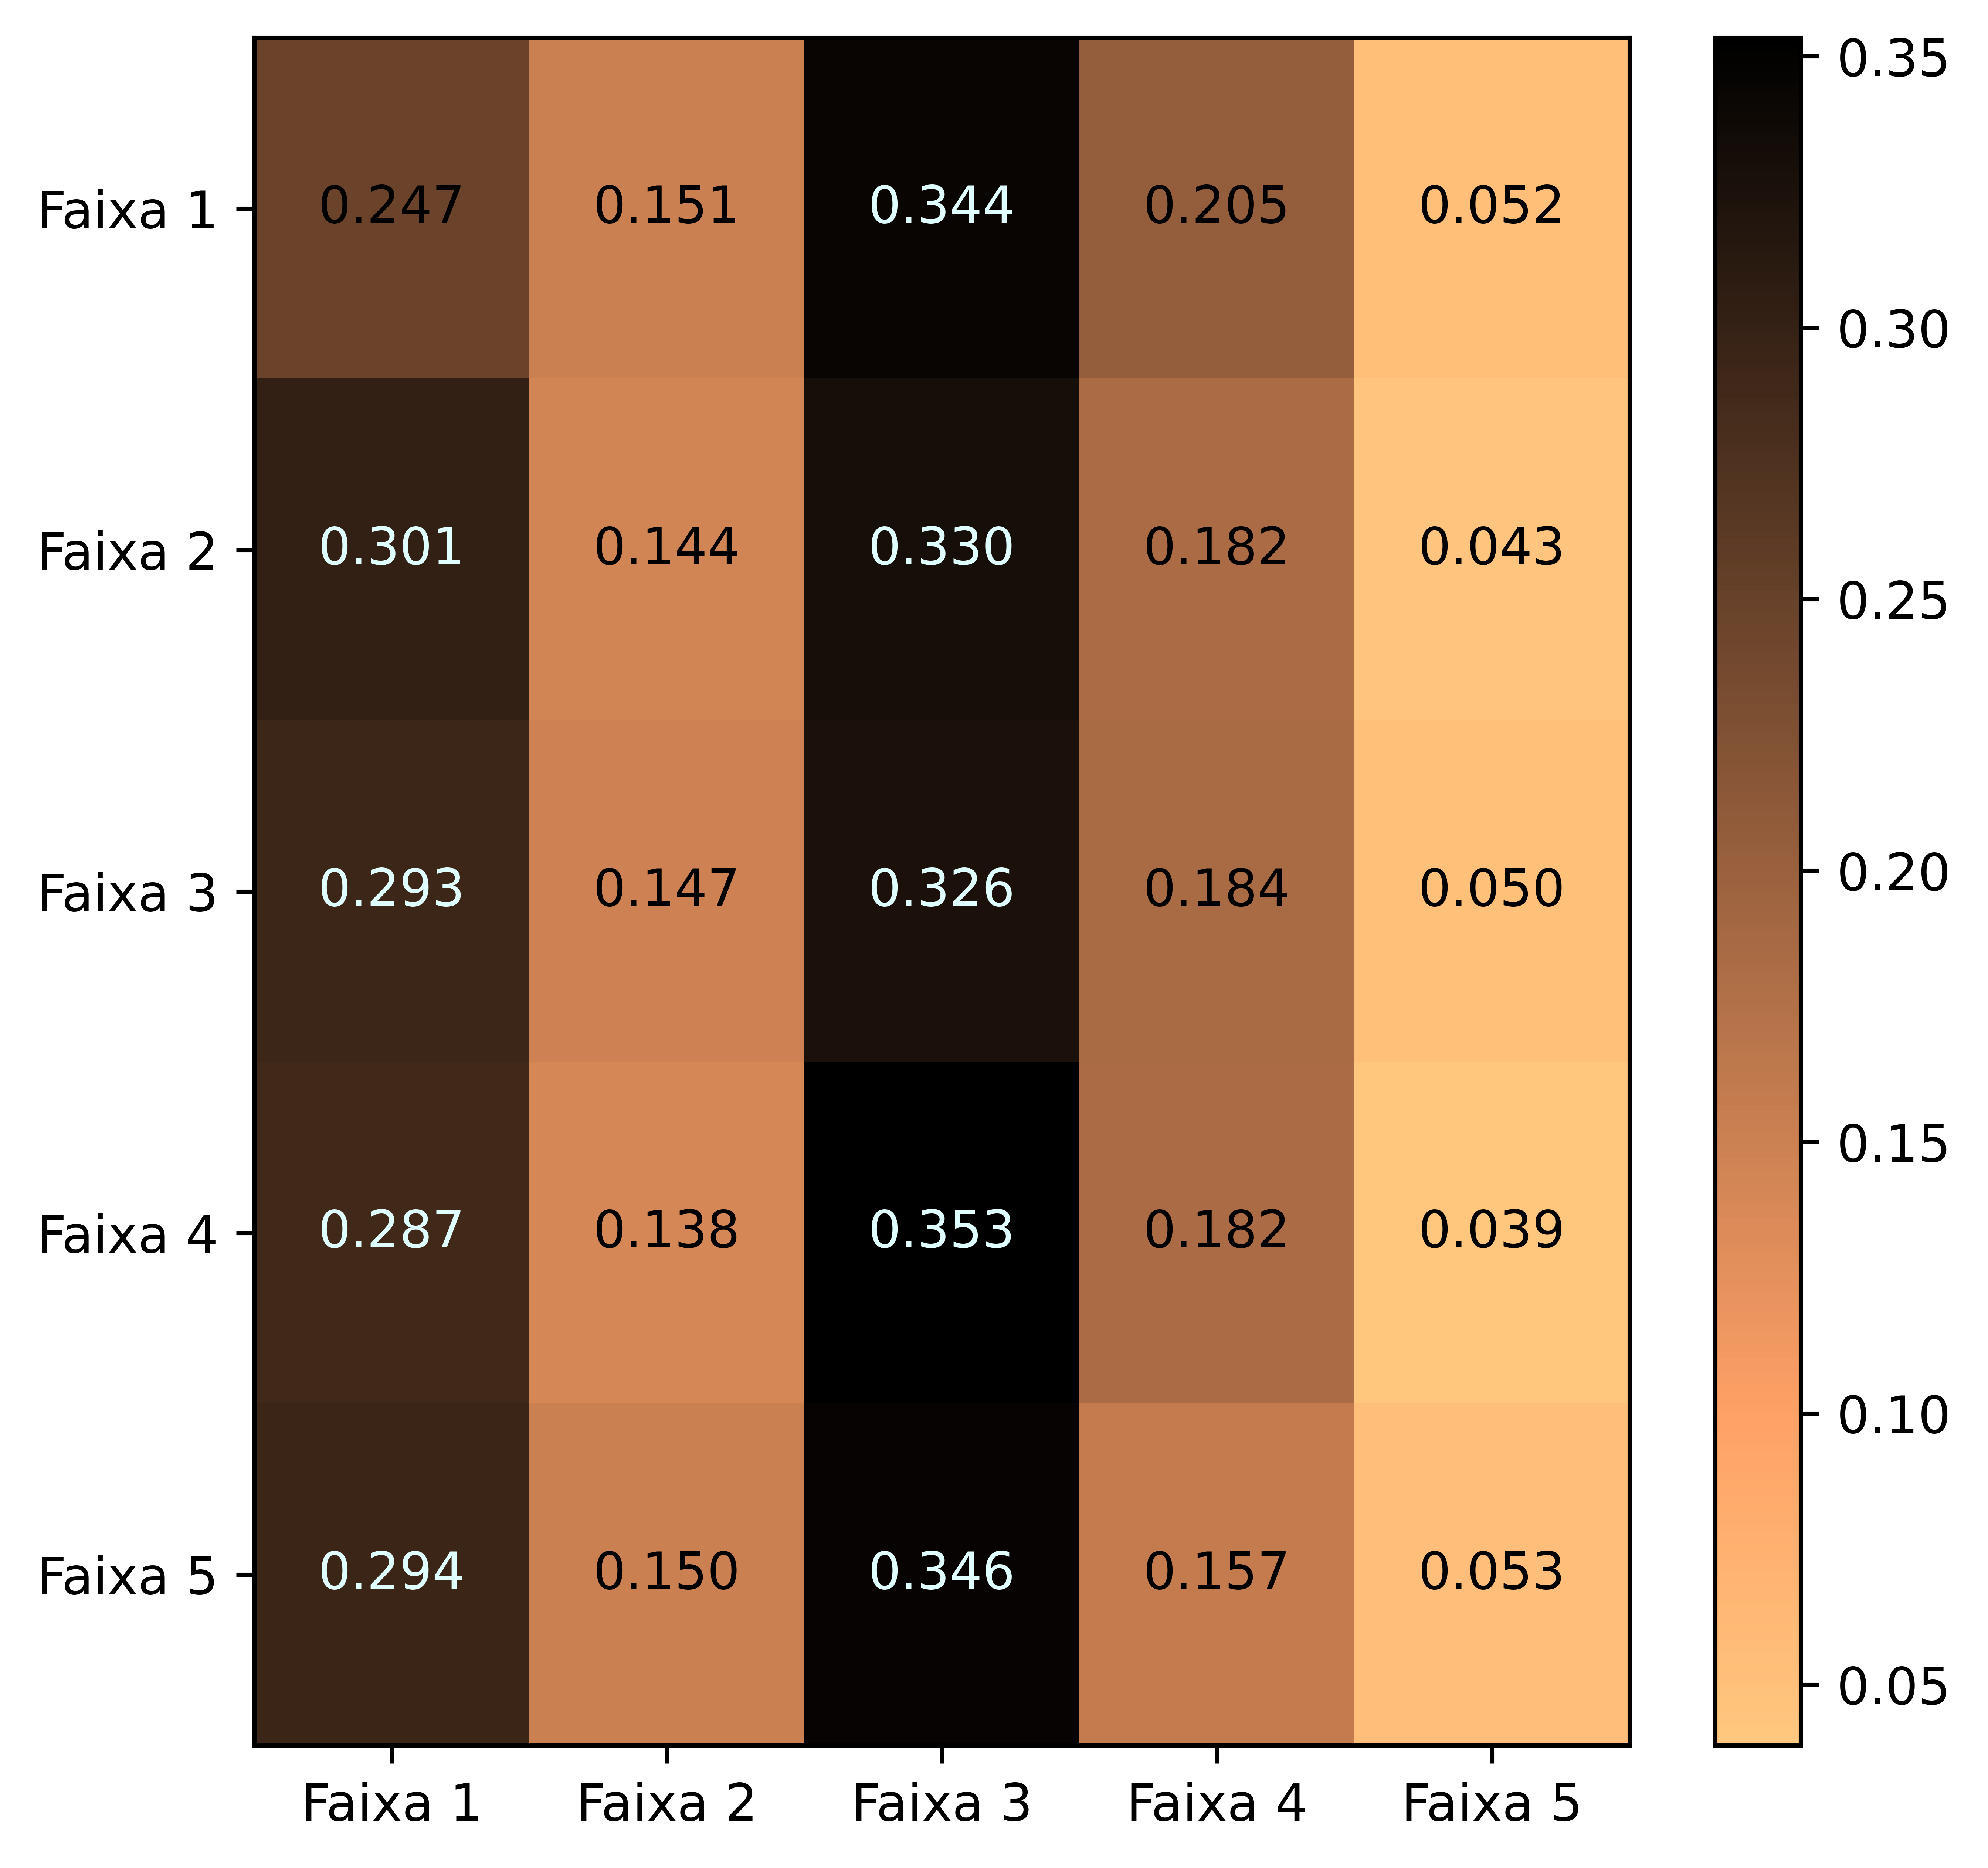

In [69]:
B = np.array(B)
plt.figure(figsize=(6,6),dpi = 1000)
plt.imshow(B, cmap='copper_r', aspect='auto')
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        plt.annotate(f'{B[i, j]:.3f}', xy=(j, i), ha='center', va='center', color='lightcyan' if(B[i, j] > 0.25) else "black")
# Configurações do heatmap
x_labels = [f"Faixa {i+1}"for i in range(5)]
y_labels = [f"Faixa {i+1}"for i in range(5)]
plt.xticks(np.arange(B.shape[1]), x_labels)
plt.yticks(np.arange(B.shape[0]), y_labels)
plt.colorbar()  # Barra de cores indicando os valores
#plt.title('Heatmap Example')
plt.savefig("./img/heat.png")
# Exibir o heatmap
plt.show()

In [12]:
vetor = np.loadtxt("./C/test.txt")
faixa_ = np.loadtxt("./C/test2.txt",dtype=int)

In [15]:
print(f"Grau médio dos dados: {np.mean(np.sum(vetor,axis = 1))}")
for i in range(5):
    print(np.sum(contagem[faixas == i].T,axis = 1)/np.sum(np.sum(contagem[faixas == i].T,axis = 1)))

Grau médio dos dados: 13.464059059707292
[0.29771209 0.15052667 0.33562691 0.17518972 0.04094461]
[0.35855049 0.13868078 0.31490228 0.15081433 0.03705212]
[0.37348668 0.13827395 0.30140955 0.15046697 0.03636285]
[0.37149152 0.12941176 0.31777925 0.14611148 0.03520599]
[0.38118684 0.13708215 0.30707437 0.13397253 0.04068412]


In [50]:
for i in range(5):
    print(np.sum(vetor[faixa_ == i].T,axis = 1)/np.sum(np.sum(vetor[faixa_ == i].T,axis = 1)))

[0.25003844 0.14827003 0.34224204 0.20805782 0.05139167]
[0.33518737 0.13390809 0.31669332 0.17082667 0.04338455]
[0.33351316 0.13651621 0.30504106 0.18120242 0.04372715]
[0.35495042 0.12891547 0.31722546 0.164017   0.03489165]
[0.36067343 0.13468595 0.31491474 0.14353551 0.04619037]


In [80]:
np.savetxt("./C/dados/lambda.txt",-np.array(A),fmt = "%f")
np.savetxt("./C/dados/multi_probability.txt",np.array(B),fmt = "%f")
np.savetxt("./C/dados/multi_constant.txt",np.exp(np.array(C)),fmt = "%f")

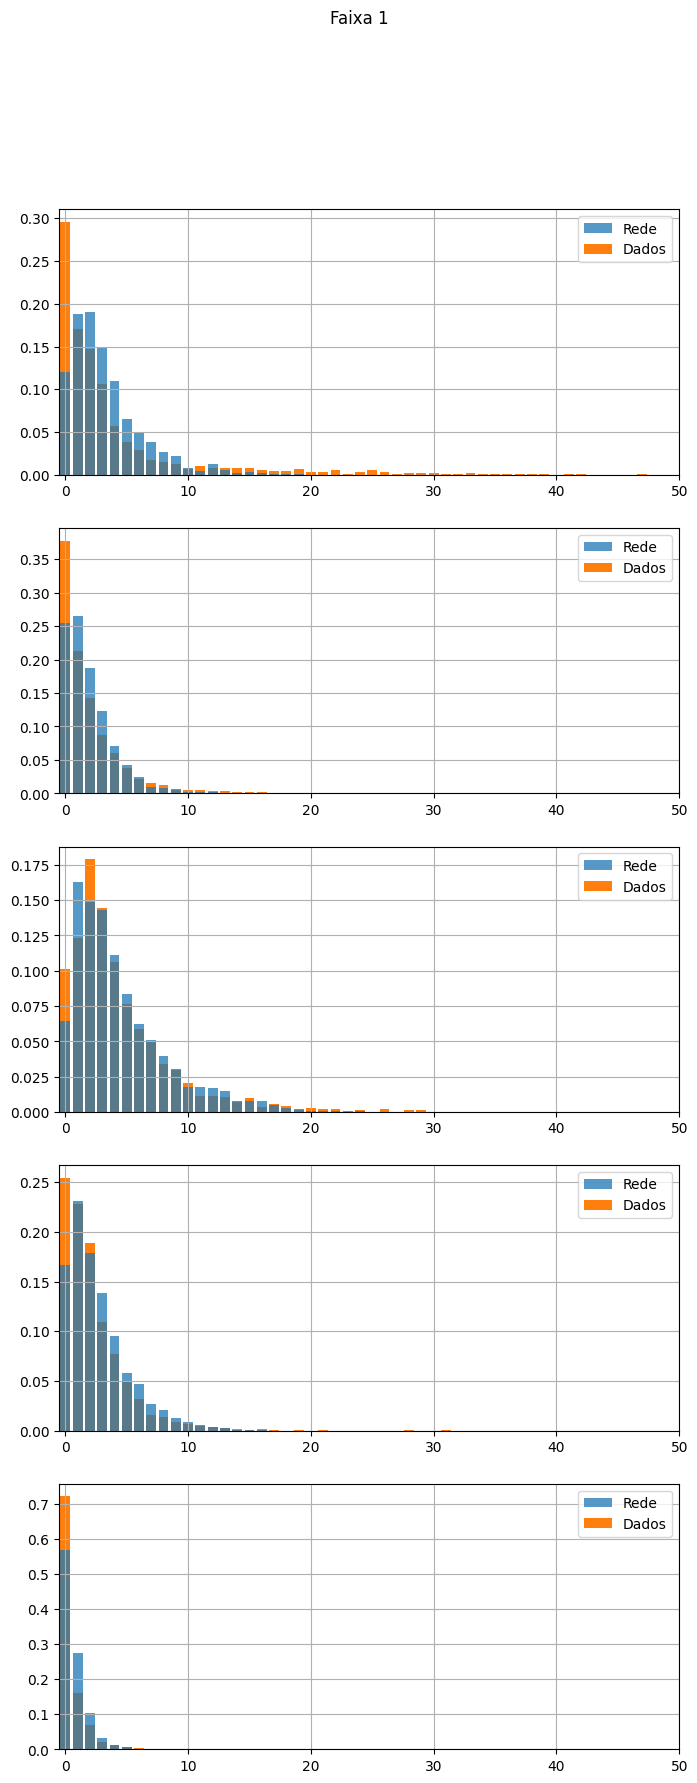

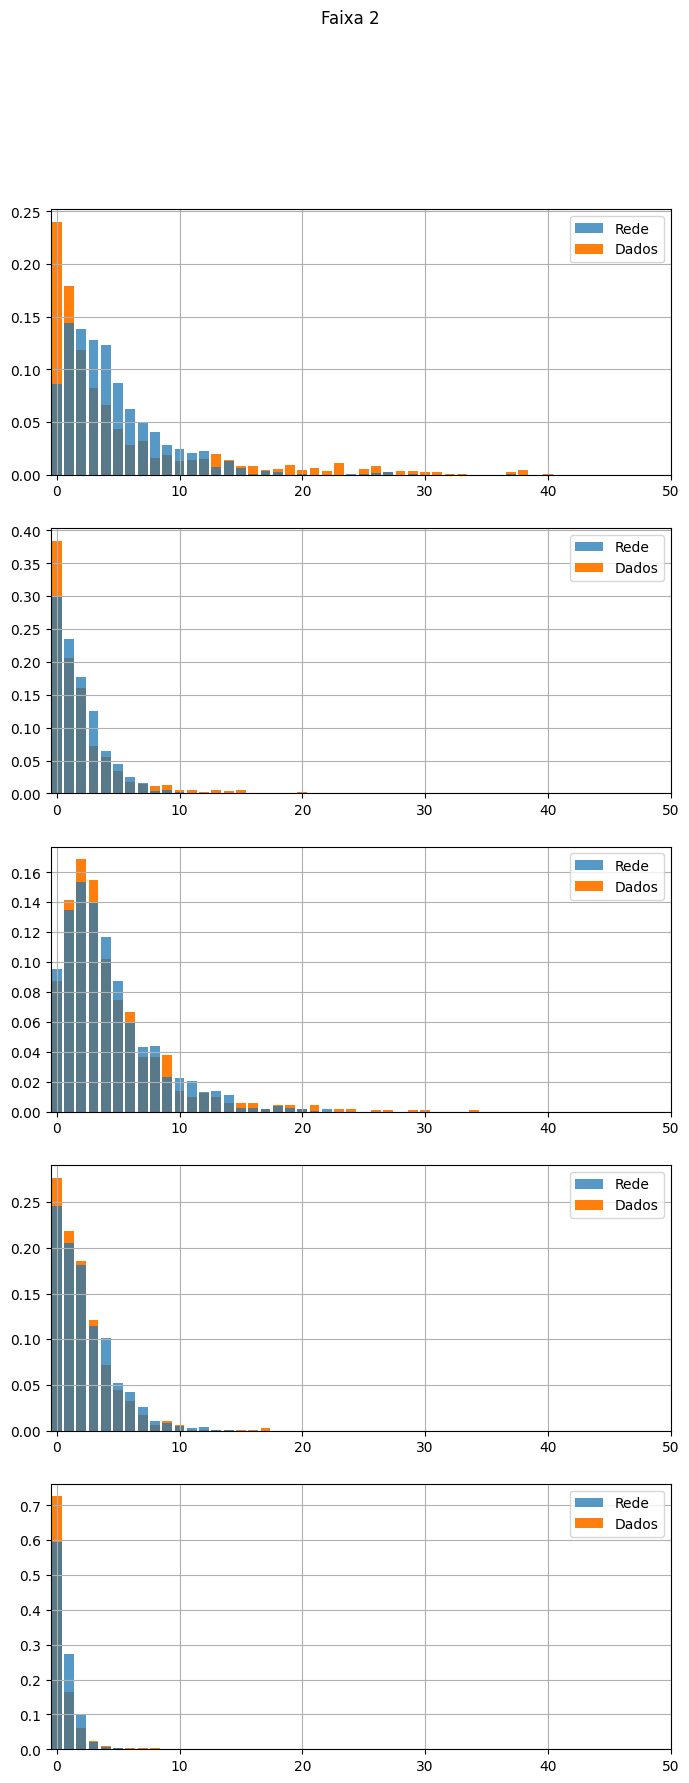

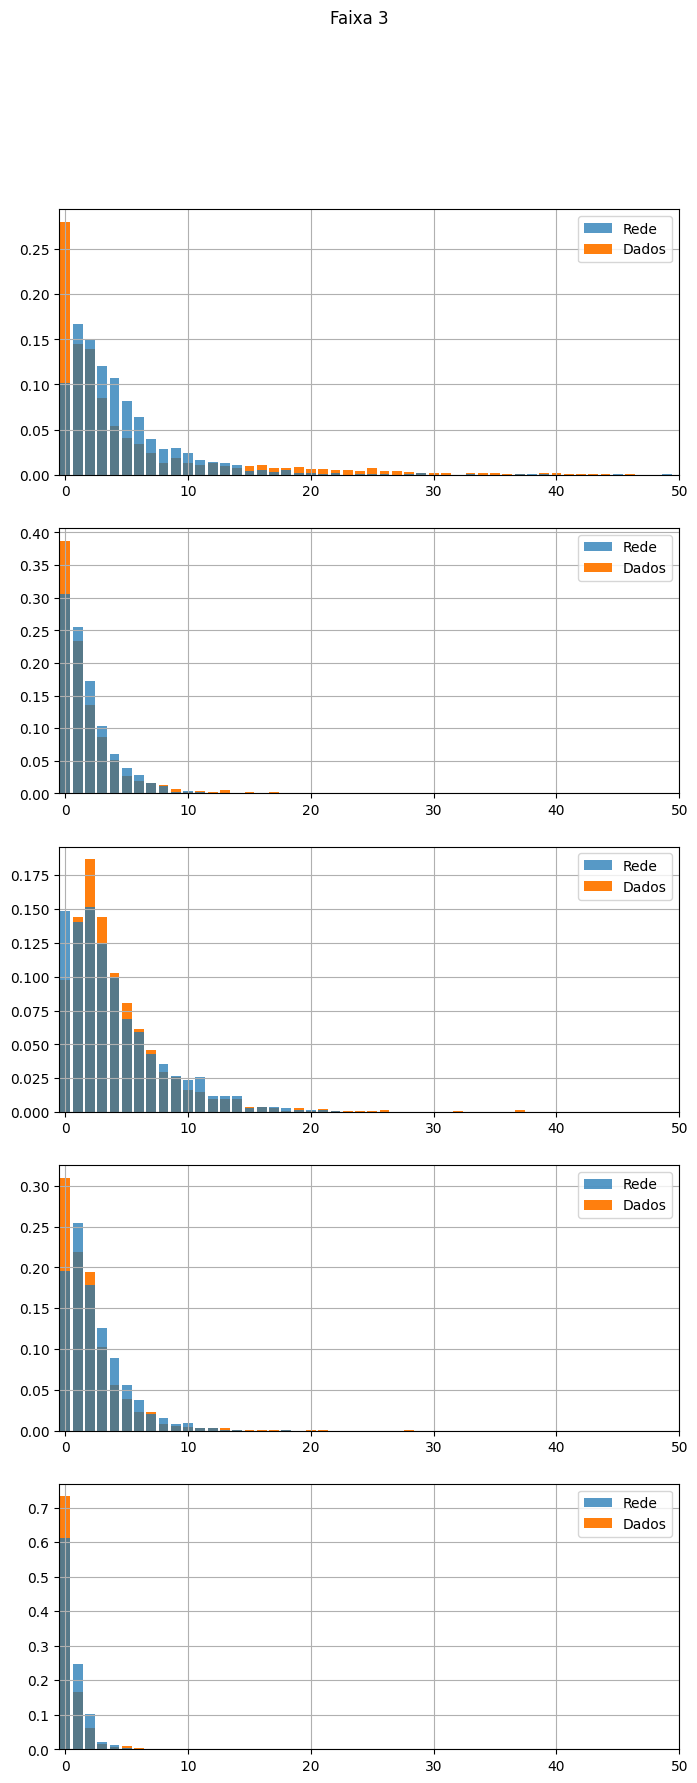

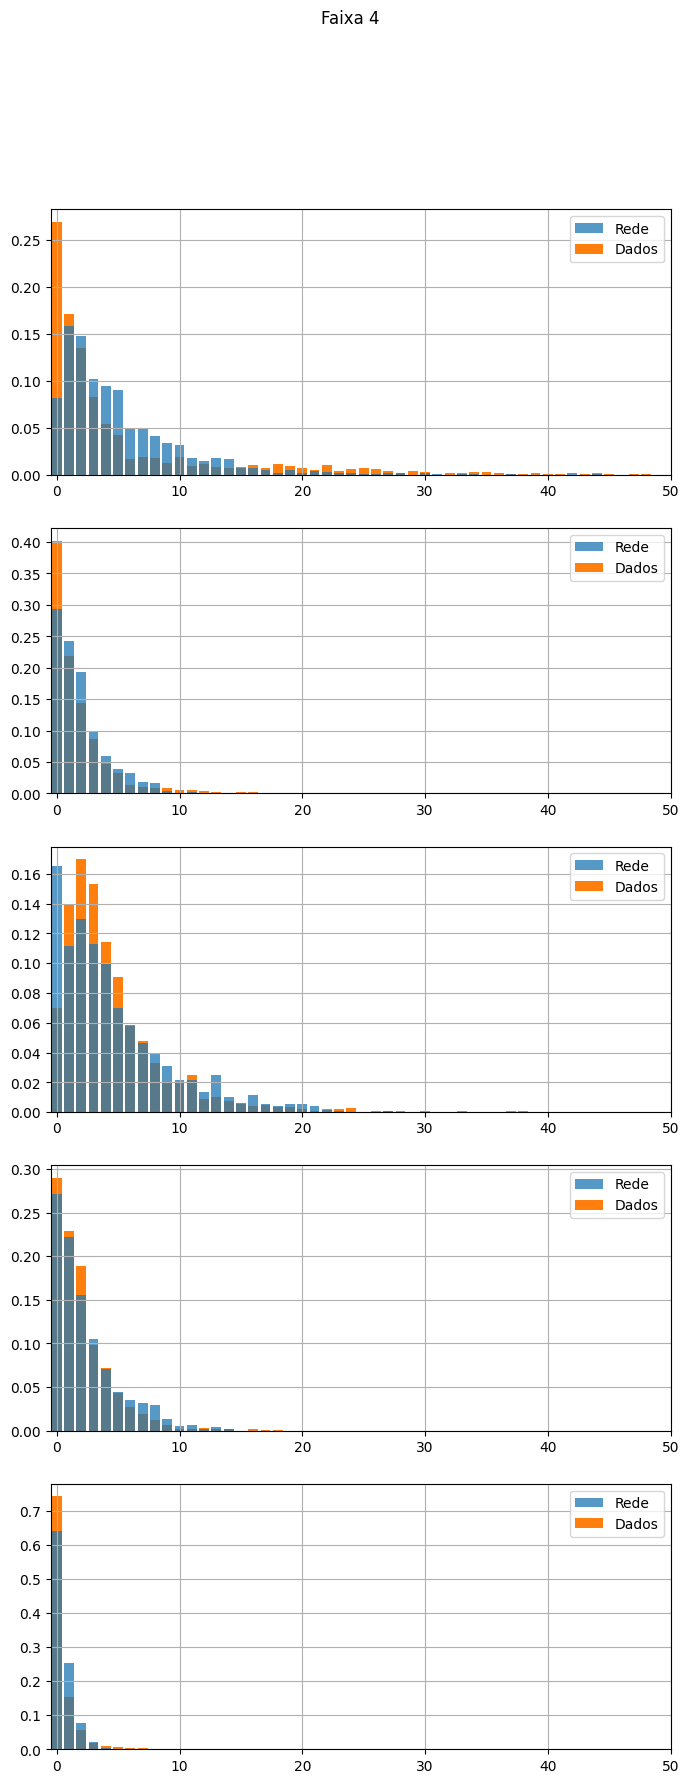

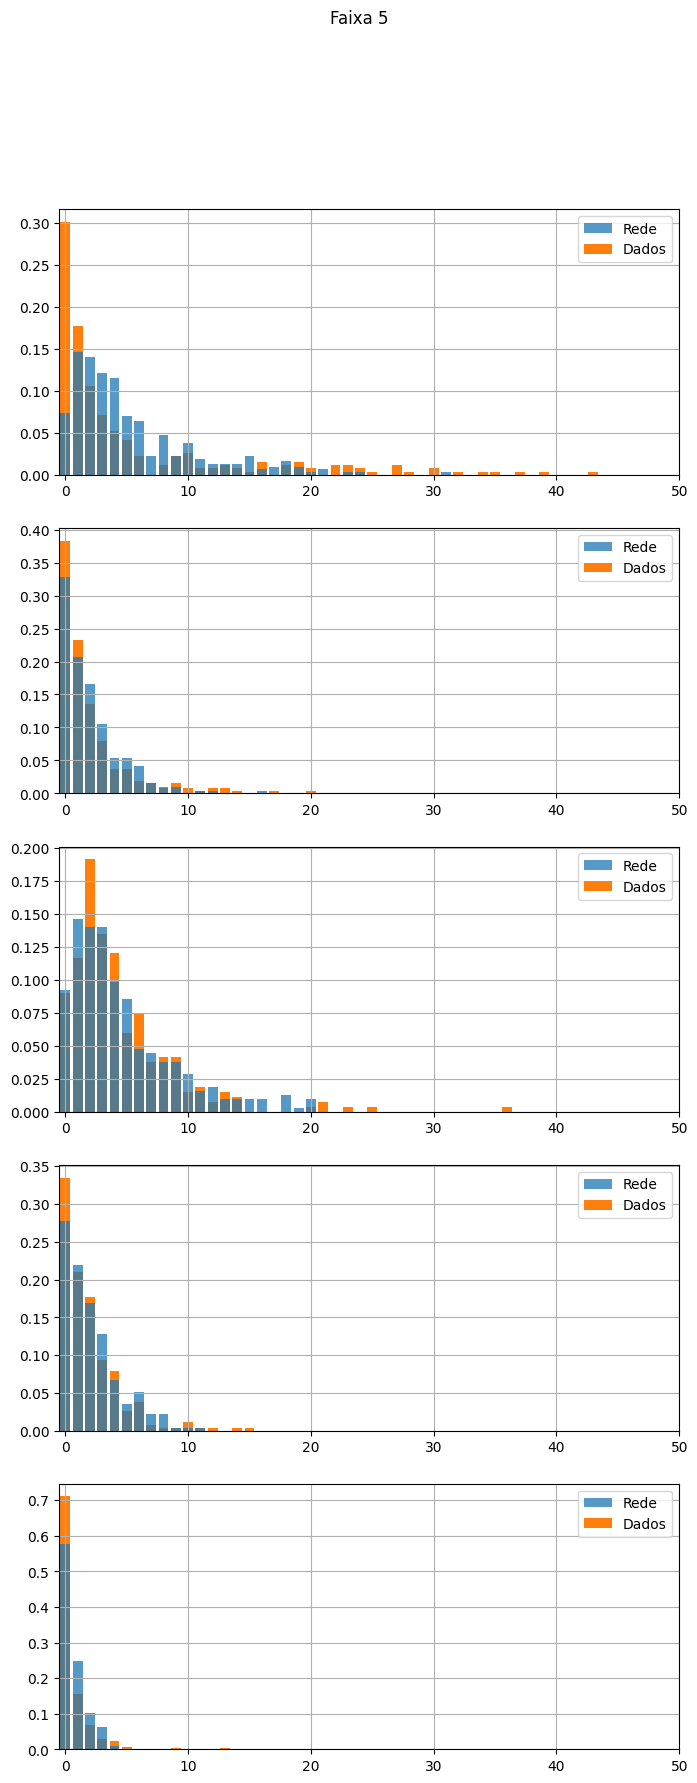

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [17]:
comparacao(contagem,faixas,1,vetor,faixa_)